## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [1]:
api_key = "M9GPODB14JF1OU71"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [2]:
ticker = "RL"

Import the appropriate libraries in the lines below each comment:

In [4]:
# pandas
import pandas as pd
# requests
import requests
# alpha_vantage TimeSeries class
from alpha_vantage.timeseries import TimeSeries
# matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#### Access API through an HTTP request

Assign the API url to the variable "link".
<br />(refer to the Alpha Vantage documention)
<br />
<br />Format the url string to include the "api_key" variable and the "ticker" variable Reassign the url u

In [5]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=1min&apikey={api_key}"
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=RL&interval=1min&apikey=M9GPODB14JF1OU71


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [6]:
rl = requests.get(link)

Print the HTTP response:

In [7]:
print(rl)

<Response [200]>


Print the data:

In [9]:
print(rl.text)

{
    "Meta Data": {
        "1. Information": "Intraday (1min) open, high, low, close prices and volume",
        "2. Symbol": "RL",
        "3. Last Refreshed": "2019-09-23 16:00:00",
        "4. Interval": "1min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (1min)": {
        "2019-09-23 16:00:00": {
            "1. open": "92.5300",
            "2. high": "92.7700",
            "3. low": "92.5200",
            "4. close": "92.7000",
            "5. volume": "44502"
        },
        "2019-09-23 15:59:00": {
            "1. open": "92.6000",
            "2. high": "92.6100",
            "3. low": "92.5100",
            "4. close": "92.5350",
            "5. volume": "12609"
        },
        "2019-09-23 15:58:00": {
            "1. open": "92.6400",
            "2. high": "92.6500",
            "3. low": "92.5800",
            "4. close": "92.5800",
            "5. volume": "20511"
        },
        "2019-09-23 15:57:00": {
  

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier. Assign your API key to the key argument. Use "pandas" as an output format.

In [10]:
ts = TimeSeries(key=api_key,output_format='pandas')

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [11]:
data, meta_data = ts.get_intraday(symbol=ticker ,interval='1min', outputsize='compact')

Print the data:

In [12]:
print(data)

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2019-09-23 14:20:00  93.1300  93.1800  93.120    93.135     2584.0
2019-09-23 14:21:00  93.1350  93.1350  93.050    93.060     1719.0
2019-09-23 14:22:00  93.0800  93.0900  93.080    93.090      731.0
2019-09-23 14:23:00  93.0700  93.0900  93.070    93.090      428.0
2019-09-23 14:24:00  93.1100  93.1100  93.110    93.110      399.0
2019-09-23 14:25:00  93.0800  93.0800  93.040    93.040     2091.0
2019-09-23 14:26:00  93.0600  93.0800  93.050    93.050      986.0
2019-09-23 14:27:00  93.0700  93.0900  93.060    93.090     1121.0
2019-09-23 14:29:00  93.0500  93.0800  93.050    93.080     2135.0
2019-09-23 14:30:00  93.0700  93.1050  93.070    93.070     2567.0
2019-09-23 14:31:00  93.0650  93.0800  93.020    93.050     3087.0
2019-09-23 14:32:00  93.0800  93.0800  93.065    93.075     1235.0
2019-09-23 14:33:00  93.0500  93.0500  93.020    93.030     19

Plot one column of the time series data with the ticket symbol as the title of the graph.
<br />(refer to prior problem set examples)

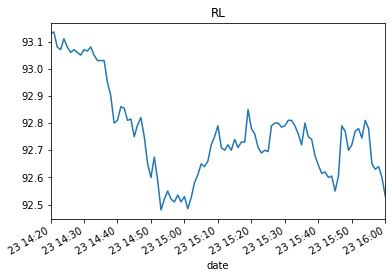

In [13]:
data['1. open'].plot()
plt.title(ticker)
plt.show()

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [14]:
data.to_excel("Ralph_Lauren_Stock_Data.xlsx")